In [22]:
import pandas as pd
import numpy as np

In [23]:
# customre data strored ......customer left or not ? .....Binary classification

df = pd.read_csv('churn.csv')

In [24]:
df.shape

(10000, 14)

In [25]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [26]:
# exited = 1...customer left the bank otherwise customer is still using this bank

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df.duplicated().sum()

0

In [29]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [30]:
# 8000 people left the job and only 2000 people is still working

df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [31]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [32]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True) # no need of these columns

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True) #use to transfrom the data

In [83]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [84]:
# what pd.get_dummies() does ? ......previous part of the dataset contains Gender and Geography as the string
# but after pd.get_dummies(df,columns = ['],drop_first = True) we can convert the whole dataset as a
#numeric dataset ........nuemeric dataset is organised

In [85]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 1)

In [86]:
X.shape

(10000, 11)

In [87]:
y.shape

(10000,)

In [88]:
# now we have to scale the data ....as the range of the estimated salary is large and also balance is also
#very large ......so we have to scale to make the weights of the neural network convergeable


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [90]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [91]:
# all the values are between anrange of -2 and 2 ..after scaling

In [92]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [93]:

model = Sequential()

model.add(Dense(3,activation = 'sigmoid',input_dim = 11)) # 11 inputs  ...3 is the number of different models
model.add(Dense(1,activation='sigmoid')) # output layer  ...1 is the number of nodes in output layer

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
model.compile(loss = "binary_crossentropy",optimizer = 'Adam')

In [97]:
history = model.fit(X_train_scaled,y_train,epochs = 10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5235
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4734
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4561
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4478
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4424
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4385
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4357
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4335
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4318
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4305


In [98]:
model.layers[0].get_weights() ##  weights are stored in the layers[0] layers[1] ....etc   11 x 3 weights

[array([[ 0.0084284 ,  0.06474418,  0.20879725],
        [-1.4927987 , -1.168521  , -1.6511687 ],
        [ 0.1222825 , -0.07741862, -0.00192606],
        [ 0.04286945, -0.5637583 , -0.7194426 ],
        [-0.03947541,  0.1842893 ,  0.06564036],
        [ 0.22759424,  0.11829524, -0.13051039],
        [ 0.77165943,  0.8017122 ,  0.71163493],
        [-0.35574374, -0.12889923,  0.30514935],
        [-1.0822368 , -0.3386487 , -0.07183913],
        [-0.14555532, -0.17626868,  0.12715587],
        [ 0.5097618 ,  0.5070526 ,  0.4692364 ]], dtype=float32),
 array([ 0.25942653, -0.08277754,  0.22446343], dtype=float32)]

In [99]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [100]:
y_pred = np.where(y_log>0.5,1,0)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [102]:
import matplotlib.pyplot as plt

In [103]:
history.history

{'loss': [0.5235067009925842,
  0.47341418266296387,
  0.45609259605407715,
  0.44778260588645935,
  0.4423956573009491,
  0.43852365016937256,
  0.4356920123100281,
  0.43346107006073,
  0.4317699372768402,
  0.4304708242416382]}

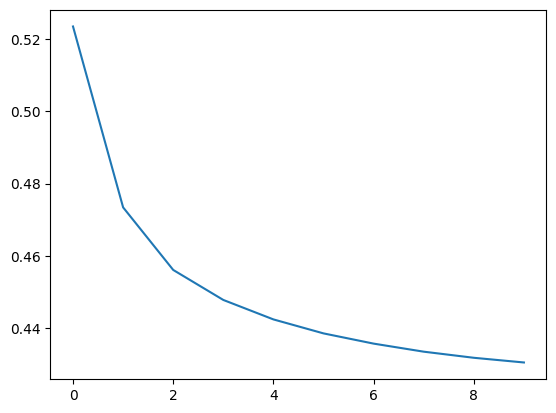

In [104]:
plt.plot(history.history['loss'])